## ДЗ к Уроку 1. Алгоритм линейной регрессии. Градиентный спуск

1. Подберите скорость обучения (eta) и количество итераций

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [31]:
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])

In [32]:
X.shape

(10, 2)

In [33]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

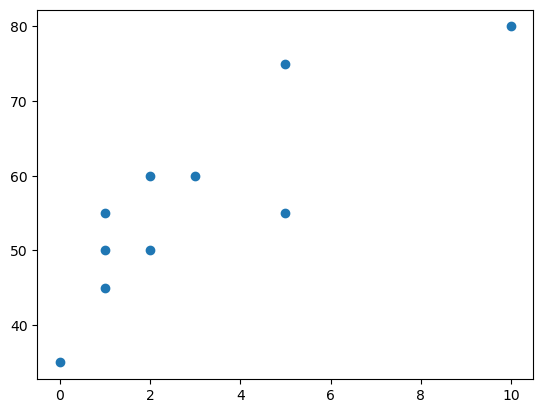

In [34]:
plt.scatter(X[:, 1], y);

In [35]:
y_pred1 = 5 * X[:, 1] + 35 * X[:, 0] 
y_pred2 = 7.5 * X[:, 1] + 40 * X[:, 0]

plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred1, label='1')
plt.plot(X[:, 1], y_pred2, label='2')
plt.legend()
plt.show()

Отклонение

In [36]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)
err1, err2

(65, -60.0)

MAE (Mean Absolute Error)

In [37]:
mae_1 = np.mean(np.abs(y - y_pred1))
mae_2 = np.mean(np.abs(y - y_pred2))
mae_1, mae_2

(8.5, 9.0)

MSE (Mean Squared Error)

In [38]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

(97.5, 188.75)

## Метод наименьших квадратов (МНК)

In [39]:
W_analytical = np.linalg.inv(np.dot(X.T, X)) @ X.T @ y
W_analytical

array([45.0625,  3.8125])

In [40]:
y_pred_analytical = W_analytical[0] * X[:, 0] + W_analytical[1] * X[:, 1]
y_pred_analytical = X @ W_analytical

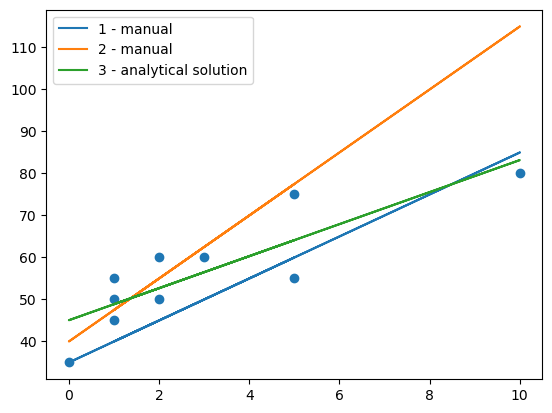

In [41]:
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred1, label='1 - manual')
plt.plot(X[:, 1], y_pred2, label='2 - manual')
plt.plot(X[:, 1], y_pred_analytical, label='3 - analytical solution')
plt.legend()
plt.show()

In [42]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [43]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(8.5, 97.5)

In [44]:
calc_mae(y, y_pred2), calc_mse(y, y_pred2)

(9.0, 188.75)

In [45]:
calc_mae(y, y_pred_analytical), calc_mse(y, y_pred_analytical)

(5.7875, 43.96875)

## Градиентный спуск

In [46]:
W = np.random.normal(size=(X.shape[1]))
W

array([0.69253398, 1.11565488])

In [47]:
eta = 0.02 # величина шага

In [48]:
X.shape,  W.shape

((10, 2), (2,))

In [49]:
n = len(y)
dQ = 2/n * X.T @ (X @ W - y) # градиент функции ошибки
dQ

array([-104.92100274, -357.91253008])

In [50]:
grad = eta * dQ
grad

array([-2.09842005, -7.1582506 ])

In [51]:
print(f'previous weights', W)
W = W - grad
print(f'new weights', W)

previous weights [0.69253398 1.11565488]
new weights [2.79095403 8.27390549]


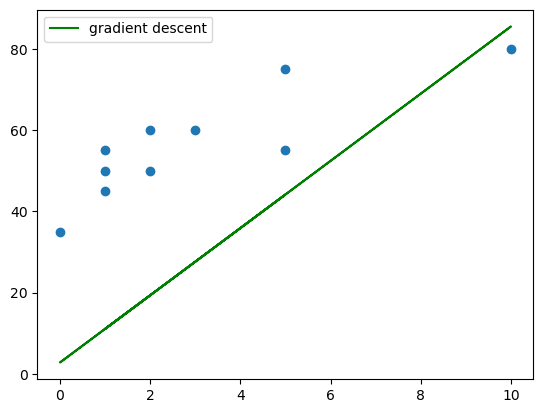

In [52]:
y_pred_grad = X @ W
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred_grad, label='gradient descent', c='g')
plt.legend()
plt.show()

## Домашнее задание

1. Подберите скорость обучения (eta) и количество итераций

In [53]:
n = X.shape[0]

eta =  1e-1 
n_iter = 500

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    if i % 10 == 0:
        eta /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 4)}')

Number of objects = 10        
Learning rate = 0.1        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [11.8 38.2], MSE = 3047.75
Iteration #10: W_new = [12651.73553914 69617.0969639 ], MSE = 18310954068.0478
Iteration #20: W_new = [ 7732434.81888021 42641607.37852186], MSE = 9128819654907568.0
Iteration #30: W_new = [1.06344502e+09 5.86454589e+09], MSE = 2.327920364266843e+20
Iteration #40: W_new = [3.00127077e+10 1.65510116e+11], MSE = 2.5451335298159335e+23
Iteration #50: W_new = [1.55345341e+11 8.56677968e+11], MSE = 9.572295620500073e+24
Iteration #60: W_new = [1.27742291e+11 7.04456313e+11], MSE = 9.351480126475958e+24
Iteration #70: W_new = [1.38141953e+10 7.61806995e+10], MSE = 1.640858952828383e+23
Iteration #80: W_new = [1.51674189e+08 8.36432543e+08], MSE = 3.1255335378744386e+19
Iteration #90: W_new = [116395.49988139 641638.79864291], MSE = 31317286806394.043
Iteration #100: W_new = [48.41966454 22.99883908], MSE = 53518.8645
Iteration #110: W_new = [44.9771605   3

2*. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [54]:
X.shape

(10, 2)

Транспонируем матрицу, для нахождения частных прпоизводных

In [55]:

# dQ = 2/n * X.T @ (X @ W - y) - формула градиента функции ошибки имеет вид

In [56]:
(X.T).shape, len(y)

((2, 10), 10)

In [57]:
n = X.shape[0]

eta = 1e-2
n_iter = 700

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)


    W -= eta * (1/n * 2 * np.dot(X.T, y_pred - y)) # ИЗМЕНЕНИЯ: в формулу подставили Значения X.T, транспорнированной матрицы X
    #
    if i % 100 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #100: W_new = [28.38281518  6.83710367], MSE = 177.43
Iteration #200: W_new = [38.38986469  5.02247953], MSE = 65.33
Iteration #300: W_new = [42.39314129  4.29654705], MSE = 47.39
Iteration #400: W_new = [43.99463466  4.00614091], MSE = 44.52
Iteration #500: W_new = [44.63530512  3.8899652 ], MSE = 44.06
Iteration #600: W_new = [44.89160255  3.84348962], MSE = 43.98
